# Visualizing data with Python

This is a tutorial for making simple exploratory and publication-grade charts using Matplotlib and pandas.

First, let's load matplotlib's pyplot module.

In [7]:
import matplotlib.pyplot as plt
# This Jupyter magic function will draw our charts right into the notebook
%matplotlib inline

Matplotlib takes in data as lists. Let's make the simplest chart possible using a small list.

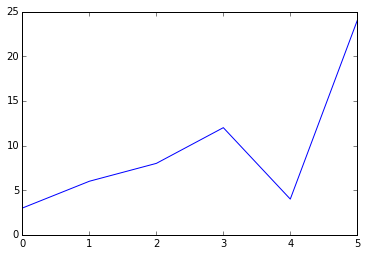

In [8]:
data = [3,6,8,12,4,24]
plt.plot(data)

If you only feed Matplotlib one list, it will assume the numbers are on the y axis. It will generate an x axis with the index of each y value. Let's give it x values now.

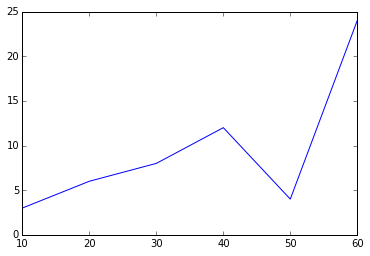

In [9]:
x = [10, 20, 30, 40, 50, 60]
plt.plot(x, data)

As you can see, when you pass in two lists, the x axis values must come first. 

Now this chart isn't very informative. Let's give it a title and axis labels.

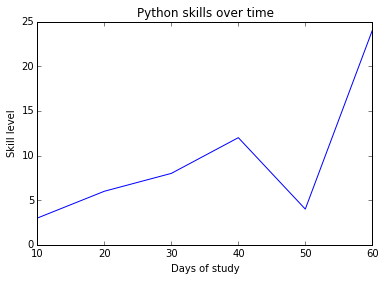

In [10]:
plt.plot(x, data)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

You know what, these charts are pretty ugly. Thankfully, Matplotlib comes with a few preset styles. Let's list them all.

In [11]:
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


I like the FiveThirtyEight style. Let's use that. But I want a dotted red line instead.

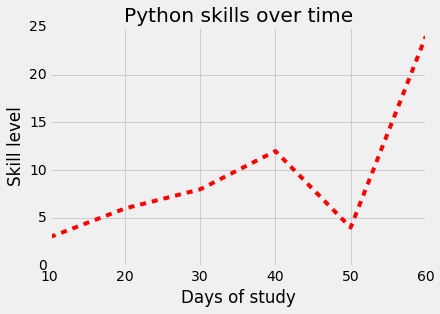

In [12]:
plt.style.use('fivethirtyeight')
plt.plot(x, data, 'r--')  # Adds marker color and style
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

Actually, I think I prefer green squares.

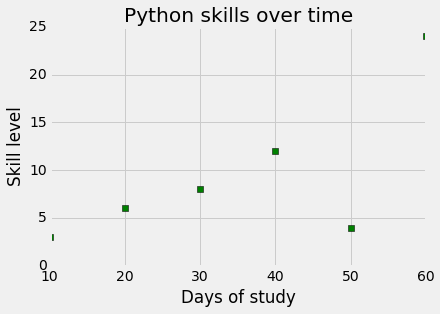

In [13]:
plt.plot(x, data, 'gs')
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

Here's a [handy reference](http://matplotlib.org/api/markers_api.html) for all the possible markers you can use in Matplotlib.
But now some of the points are outside the chart limits. So let's fix our limits.

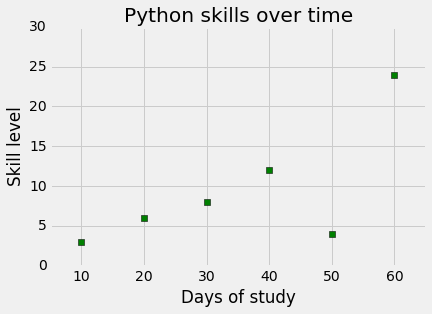

In [14]:
plt.plot(x, data, 'gs')
plt.xlim(5, 65) # lowest and highest values on the scale
plt.ylim(0, 30)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")

That drop on the 50th day? It stands out. Let's explain it with an annotation. And let's go back to a blue line.

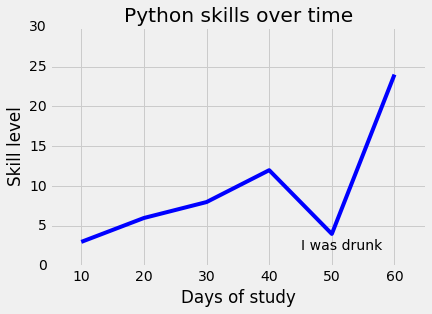

In [15]:
plt.plot(x, data, 'b-')
plt.xlim(5, 65)
plt.ylim(0, 30)
plt.title("Python skills over time")
plt.xlabel("Days of study")
plt.ylabel("Skill level")
plt.text(45, 2, "I was drunk")  # x position, y position, text

OK, so we can make pretty annotated line charts with fake data. Wahoo. What we really want is to load in real data and get insights out of it. For this, we'll use pandas, a powerful data analysis library that's very good at importing data from text files, like a CSV.

Let's load in some data on the emissions of air pollutants by businesses in Colorado. [Source: EPA](http://www3.epa.gov/airquality/airdata/ad_data.html)

In [16]:
import pandas as pd

# Load file into a pandas data frame and print the first 10 rows
df = pd.read_csv("co_air_quality.csv")
df.head(10)

,Facility Name,Facility Address,Nitrogen Oxides,PM10,PM2.5,Volatile Organic Compounds
0,.PETROLEUM DEV - SATER 11; 12; 21; 22-19,NW NW SEC 19 T4N R63W,1.759880,0.010000,0.010000,1.231880
1,1111 TOWER - FOUR SEASONS HOTEL,1111 14th St,7.730300,0.354318,0.354318,0.354318
2,31ST ST,Unknown,188.416000,4.942880,4.794590,12.031100
3,36TH ST,Unknown,159.948000,4.402070,4.270010,10.755400
4,910 GENERATION COMPANY,910 15TH ST STE 1050,11.160000,0.455400,0.435309,1.569100
5,A & S CONSTRUCTION CO. - ASPHALT,6200 COUNTY ROAD 107,8.150060,0.976910,0.413866,5.879524
6,ABSMEIER LANDSCAPING - MALOUFF,NE NE SEC 4 T36N R8E,0.400000,1.048201,0.415919,0.050000
7,ACA PRODUCTS; INC.,AVERY PIT,0.152334,12.418902,4.019908,0.217955
8,ACH FOAM TECHNOLOGIES-EPS PRODUCTS,5250 SHERMAN ST,2.720000,0.209200,0.174770,92.740000
9,ACME BRICK COMPANY,401 PRAIRIE HAWK DR,26.676000,11.758967,7.946095,3.045000


Pandas neatly loaded up the data and diplays it in a nice table format in the Jupyter notebook.

The data we're using here has been prepared and is ready for action. In the real world, you may need to clean and reshape the data to make it usable. Pandas is good for that, too.

Now let's rename our columns so we can use them more conveniently.

In [17]:
df.columns = ["name", "address", "NOx", "PM10", "PM25", "VOC"]
df.head()

,name,address,NOx,PM10,PM25,VOC
0,.PETROLEUM DEV - SATER 11; 12; 21; 22-19,NW NW SEC 19 T4N R63W,1.75988,0.010000,0.010000,1.231880
1,1111 TOWER - FOUR SEASONS HOTEL,1111 14th St,7.73030,0.354318,0.354318,0.354318
2,31ST ST,Unknown,188.41600,4.942880,4.794590,12.031100
3,36TH ST,Unknown,159.94800,4.402070,4.270010,10.755400
4,910 GENERATION COMPANY,910 15TH ST STE 1050,11.16000,0.455400,0.435309,1.569100


You can pass in a column to matplotlib and it will behave like a list (officially, a column, or any one-dimensional sequence of data, is called a **Series** in pandas). 

A column can be called with dot notation, e.g. `df.column` or as a dictionary lookup, e.g. `df['column']`.

Let's look at a histogram of VOCs divided into 20 bins.

(array([  1.72200000e+03,   9.50000000e+01,   3.50000000e+01,
          1.30000000e+01,   7.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.20000000e-05,   3.49435885e+01,   6.98871649e+01,
          1.04830741e+02,   1.39774318e+02,   1.74717894e+02,
          2.09661471e+02,   2.44605047e+02,   2.79548624e+02,
          3.14492200e+02,   3.49435777e+02,   3.84379353e+02,
          4.19322929e+02,   4.54266506e+02,   4.89210082e+02,
          5.24153659e+02,   5.59097235e+02,   5.94040812e+02,
          6.28984388e+02,   6.63927965e+02,   6.98871541e+02]),
 <a list of 20 Patch objects>)

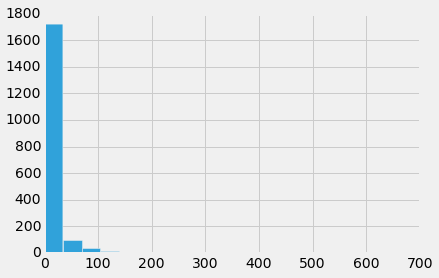

In [18]:
plt.hist(df.VOC, bins=20)

We see that the vast majority of records are in the lower end of emissions, between 0 and 30. But there are a few heavy polluters. Let's see the distribution of the data another way, as a box plot.

{'boxes': [<matplotlib.lines.Line2D at 0x108ac0650>],
 'caps': [<matplotlib.lines.Line2D at 0x108acd510>,
 'fliers': [<matplotlib.lines.Line2D at 0x108b9a810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x108b9a1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x108ac07d0>,
  <matplotlib.lines.Line2D at 0x108ac0e90>]}

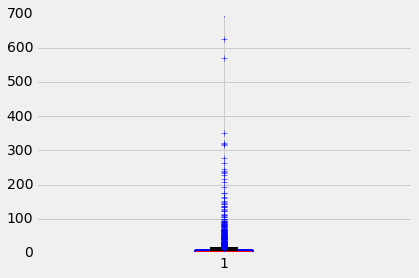

In [19]:
plt.boxplot(df.VOC)

The average value (long black line) is quite low, but the highest values are pretty huge, comparatively. 

Let's compare the boxplots of all the pollutants in the data. If we want to see charts side-by-side, matplotlib lets us create subplots in the same canvas.

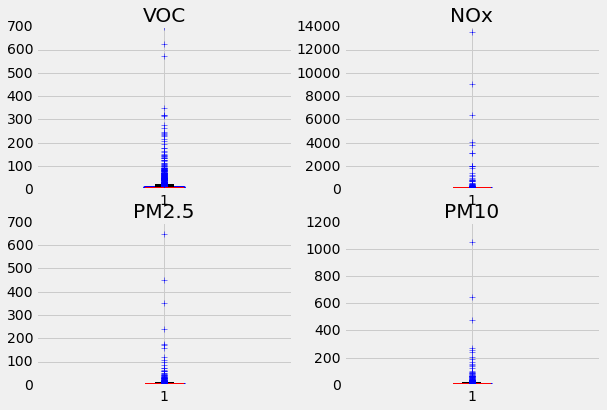

In [20]:
# First, create the canvas for the four charts. Let's make it big, 9 x 6 inches.
fig = plt.figure(figsize=[9, 6])

# Then create the subplots. 
# The three numbers you pass to add_subplot are: number of rows, number of columns,
# and which plot in this grid you're defining. So 221 means a canvas with two across, 
# two down, specifying the top-left (1) subplot. 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Now call the plot for each and set their titles.

ax1.boxplot(df.VOC)
ax1.set_title("VOC")

ax2.boxplot(df.NOx)
ax2.set_title("NOx")

ax3.boxplot(df.PM25)
ax3.set_title("PM2.5")

ax4.boxplot(df.PM10)
ax4.set_title("PM10")

Similar distributions across all pollutants. 

Notice that instead of calling `title` on the plot, we called `set_title`. That's because we are now adding a title to a plot instance instead of matplotlib (plt) itself. This gives us a lot more customizing power, which you'll see later on.

Now let's make a bar chart of the top 10 VOC and PM2.5 pollutants. First, we'll make a new pandas data frame for each chart.

In [21]:
# Take only the name and VOC columns, sort descending by VOC and take the top 10 rows.
# Note that when taking multiple columns, the dictionary lookup notation must be used.
top_VOC = df[["name", "VOC"]].sort("VOC", ascending=False).head(10)
top_VOC

,name,VOC
1841,WPX ENERGY LLC - PARACHUTE WMF,698.871541
554,Denver Intl,625.585141
1123,MILLERCOORS; LLC - GOLDEN BREWERY,570.930000
415,COLORADO INTERSTATE GAS CO CHEYENNE STN,350.370000
1840,WPX ENERGY - RULISON WATER MANAGEMENT,320.154475
693,ENTERPRISE GAS PROC - MEEKER GAS PLANT,317.662263
1648,SUNCOR ENERGY - DENVER REFINERY,315.179760
976,KMCGEE FT LUPTON/PLATTE VALLEY/LANCASTER,276.600380
653,ENCANA OIL & GAS - HIGH MESA COMP STATIO,262.566680
1111,METAL CONTAINER CORP,245.766000


In [22]:
# Do the same with PM2.5
top_PM25 = df[["name", "PM25"]].sort("PM25", ascending=False).head(10)
top_PM25

,name,PM25
1519,ROCKY MOUNTAIN ARSENAL USARMY / FRALEY,647.144264
1787,WASTE MANAGEMENT OF COLORADO-DEN/ARAP DI,451.407938
483,CRIPPLE CREEK & VICTOR GOLD MINING CO,350.092309
1648,SUNCOR ENERGY - DENVER REFINERY,240.506849
1373,PLATTE RIVER POWER AUTHORITY - RAWHIDE,173.100294
1421,PUBLIC SERVICE CO CHEROKEE PLT,171.971395
1714,TRI STATE GENERATION CRAIG,158.842837
281,CF & I STEEL L P,118.277914
1429,PUBLIC SERVICE CO HAYDEN PLT,106.690409
1255,OWENS-BROCKWAY GLASS CONTAINER INC.,98.664760


Great, now let's make bar charts for each. Here's another way of making charts with pandas. You can call "plot" directly from the data frame and specify the kind of chart you want. In this case, we want a horizontal bar chart (barh).

For reference, here are all the kinds of plots you can call ([more on this here](http://pandas.pydata.org/pandas-docs/stable/visualization.html)):
* ‘bar’ or ‘barh’ for bar charts
* ‘hist’ for histograms
* ‘box’ for boxplots
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie charts

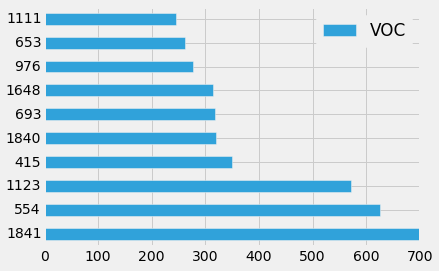

In [23]:
top_VOC.plot(kind="barh")

What the? Where are the business names? This is happening because the pandas data frame we used has the row numbers as the index, or row labels. Let's fix this by making the names column the index.

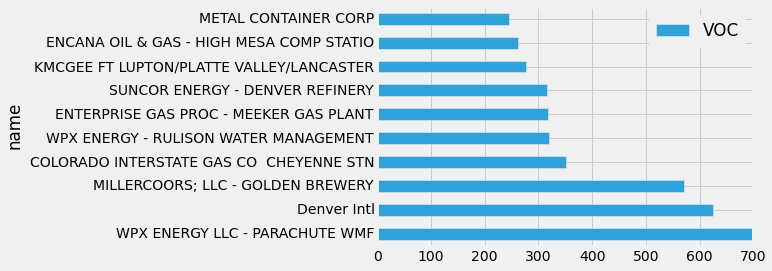

In [24]:
top_VOC = top_VOC.set_index("name")
top_VOC.plot(kind="barh")

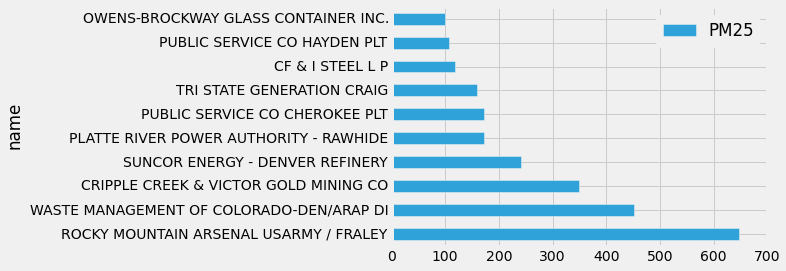

In [25]:
top_PM25 = top_PM25.set_index("name")
top_PM25.plot(kind="barh")

Look at that! If you want the bars to be sorted from highest to lowest, you just need to sort the new data frames with `ascending=True`. Remember how?

But now I want to make a double bar chart with the top VOC emitters and also how much particulate matter each of those guys emit. Let's quckly make a new data frame with both columns.

In [26]:
top_VOC = df[["name", "VOC", "PM25"]].sort("VOC", ascending=False).head(10).set_index("name")
# Re-sort the data frame inplace so the new sorting order is saved to top_VOC
top_VOC.sort("VOC", ascending=True, inplace=True)
top_VOC

,VOC,PM25
name,,
METAL CONTAINER CORP,245.766000,3.312178
ENCANA OIL & GAS - HIGH MESA COMP STATIO,262.566680,1.988200
KMCGEE FT LUPTON/PLATTE VALLEY/LANCASTER,276.600380,13.780000
SUNCOR ENERGY - DENVER REFINERY,315.179760,240.506849
ENTERPRISE GAS PROC - MEEKER GAS PLANT,317.662263,26.400000
WPX ENERGY - RULISON WATER MANAGEMENT,320.154475,0.266380
COLORADO INTERSTATE GAS CO CHEYENNE STN,350.370000,14.871976
MILLERCOORS; LLC - GOLDEN BREWERY,570.930000,36.710164
Denver Intl,625.585141,70.283926


Now we'll set the bar chart to a variable so we can customize it in all sorts of ways.

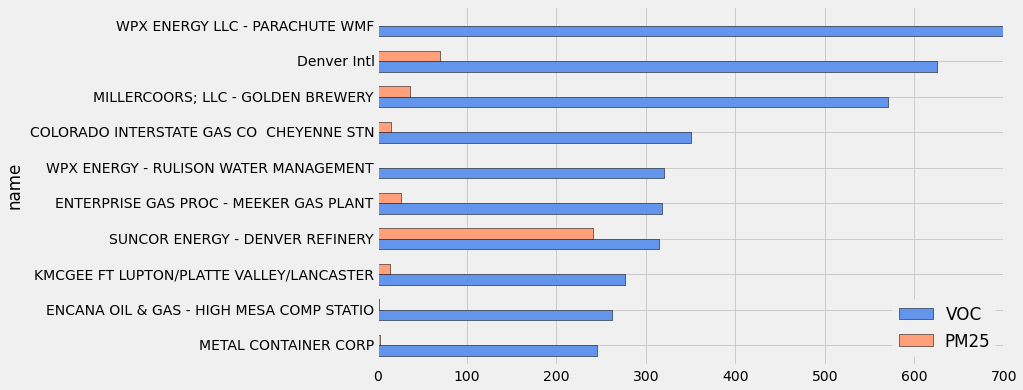

In [27]:
VOCchart = top_VOC.plot(kind="barh", figsize=[10, 6], width=0.6, color=["cornflowerblue", "#FFA07A"], edgecolor="k")
# width refers to the width of each bar
# Colors can be defined by CSS name, hex code, or one-letter abbreviation.

See how it added a different bar for each column in the data frame? And look at all the other options we can call directly within the `plot` method, like bar width, color of each bar, and the bar stroke (edgecolor).

And now that we have our plot saved as `VOCplot`, we can call all other matplotplib methods on it, too.

But what good is a chart that no one else can see? Let's also save it as a PNG.

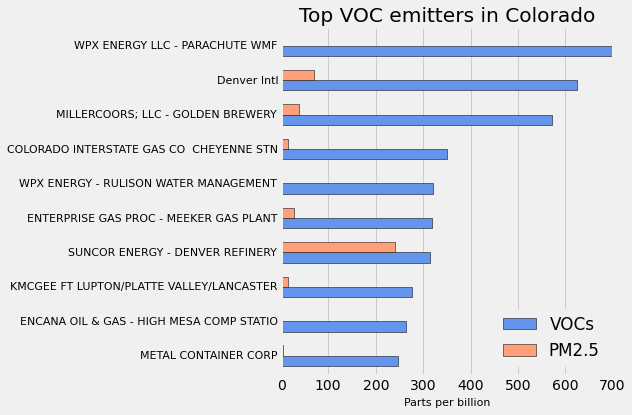

In [44]:
VOCchart = top_VOC.plot(kind="barh", 
                        figsize=[9, 6], 
                        width=0.6, 
                        color=["cornflowerblue", "#FFA07A"], 
                        edgecolor="k", 
                        grid=False) # New parameter: turn off grids

VOCchart.set_title("Top VOC emitters in Colorado")
VOCchart.set_xlabel("Parts per billion", fontsize=11)

# Get rid of the y-axis title
VOCchart.set_ylabel("")

# Make the y-axis labels a bit smaller
VOCchart.tick_params(axis="y", labelsize=11)

# But turn on grids only for the x-axis
VOCchart.xaxis.grid(True)

# Tweak the legend. loc=4 means lower-right corner
VOCchart.legend(["VOCs", "PM2.5"], loc=4)

# To save, we'll first call the tight_layout method to ensure nothing gets cut off.
plt.tight_layout()
plt.savefig("VOC_chart.png", dpi=160)

Now let's put everything together and create a reusable function that churns out charts quickly. This time, we'll create a scatter plot.

In [54]:
def scatter_plot(dataframe, x, y, title="", xlabel="", ylabel="", color="g", ylim=None):
    ax = dataframe.plot(kind="scatter", figsize=[7, 7], x = x, y = y, color=color, 
                        edgecolor="k", ylim=ylim )
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.show()  
    
    # It's necessary to call plt.show() in functions or outside a Jupyter notebook.
    # When using matplotlb inline, it's redundant.

Now that the function is created, use it.

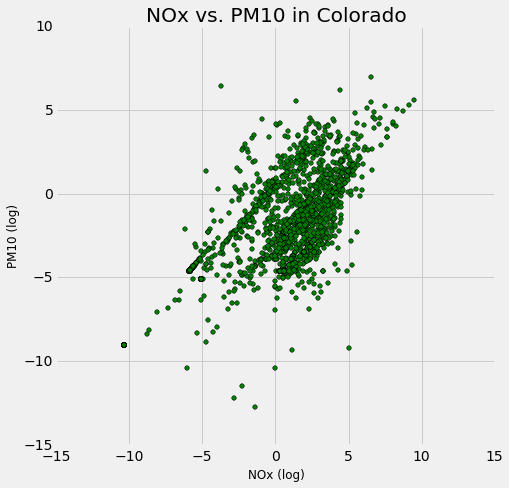

In [55]:
# Use the original data frame for this. Let's plot NOx vs. PM10. 
# But first, let's convert these columns to a logarithmic scale, since values are so disparate.
# We'll use numpy, a maths package, for this.

import numpy as np

# Create new columns in the data frame with the log values
df["log_NOx"] = np.log(df["NOx"])
df["log_PM10"] = np.log(df["PM10"])

scatter_plot(df, "log_NOx", "log_PM10", "NOx vs. PM10 in Colorado", "NOx (log)", "PM10 (log)")

## Go further

This is just the tip of all that Matplotlib can do.

__Fonts:__
    
    import matplotlib.font_manager as fm
    title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')

__Colors:__

There are many pre-installed color palettes, or color maps.
    
    import matplotlib.cm as cm
    color_map = cm.get_cmap('Pastell')

[A good Jupyter Notebook](https://github.com/gboeing/urban-data-science/blob/master/12-Python-Data-Visualization/pandas-data-visualization.ipynb) that shows you how to use them.

__Making maps:__

[Step-by-step tutorial.](https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-making-a-simple-map/)

__More on pandas__:

[An excellent introduction video.](https://www.youtube.com/watch?v=5JnMutdy6Fw)

[And another one.](https://www.youtube.com/watch?v=L4Hbv4ugUWk)


## Making interactive charts for the web

[Bokeh](http://bokeh.pydata.org/en/latest/) is another visualization library for Python that creates interactive charts easily.

[A good intro video.](https://www.youtube.com/watch?v=O5OvOLK-xqQ)
